In [1]:
import os

os.chdir("../")

In [2]:
import hydra
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra
from omegaconf import OmegaConf
from jigsaw.dataset.dynamic_dataset import build_geometry_dataloader


GlobalHydra.instance().clear()
initialize(config_path="../config")
cfg = compose(config_name="global_config")
cfg.data.batch_size = 1


/tmp/ipykernel_2099847/2674205879.py:9: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../config")
/home/ericw/data/miniconda3/envs/assembly/lib/python3.8/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'global_config': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [3]:
train_loader, _ = build_geometry_dataloader(cfg)

for data_dict in train_loader:
    data = data_dict
    break

In [4]:
part_pcs = data["part_pcs"][0]
part_quat = data["part_quat"][0]
part_trans = data["part_trans"][0]
part_valids = data["part_valids"][0]
part_pcs_gt = data["part_pcs_gt"][0]
n_pcs = data["n_pcs"][0]
part_valids = data["part_valids"][0]

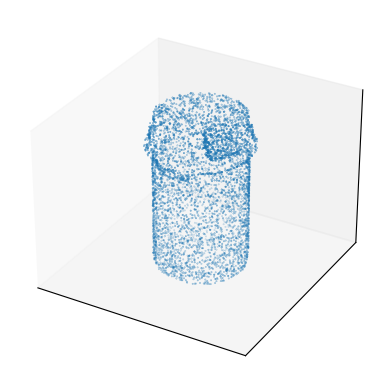

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pytorch3d import transforms

part_pcs_gt_np = part_pcs_gt.numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.scatter(part_pcs_gt_np[:, 0], part_pcs_gt_np[:, 1], part_pcs_gt_np[:, 2], s=0.1)
plt.show()

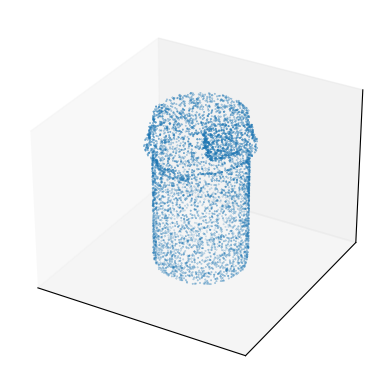

In [6]:
import torch
from pytorch3d import transforms

num_parts = torch.count_nonzero(part_valids)

results = []

cnt = 0
for i in range(num_parts):
    c_pcs = part_pcs[cnt:cnt + n_pcs[i]]
    # perform rotation and translation
    c_pcs = transforms.quaternion_apply(part_quat[i], c_pcs)
    c_pcs += part_trans[i]
    results.append(c_pcs)

    cnt += n_pcs[i]

results = torch.cat(results, dim=0)


results = results.numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.scatter(results[:, 0], results[:, 1], results[:, 2], s=0.1)
plt.show()